# Boston_Housing - Regression Analysis

## Import TensorFlow

In [1]:
import warnings
warnings.filterwarnings('ignore')

* import TensorFlow

In [2]:
import tensorflow as tf

tf.__version__

'2.9.2'

* GPU 설정 OFF

In [3]:
tf.test.gpu_device_name()

''

# I. Boston_Housing Data_Set Load & Review

> ## 1) Load Boston_Housing Data_Set

In [4]:
from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) =  boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


> ## 2) Data_Set Information

* <font color = 'blue'>'boston.csv' (506 * 14)</font>

 - CRIM: 범죄 발생률
 - ZN: 25,000평방피트를 초과하는 거주 지역의 비율
 -  INDUS: 비소매 상업 지역 비율
 - CHAS: 찰스강 인접 여부(강주변 1, 아니면 0)
 - NOX: 일산화질소 농도
 - RM: 거주 목적 방 개수
 - AGE: 1940년 이전 건축된 주택 비율
 - DIS: 보스턴 5대 고용지역까지 거리
 - RAD: 고속도로 접근성
 - TAX: 10,000달러당 재산세율
 - PTRATIO: 교사와 학생 수 비율
 - B: 흑인 거주 비율
 - LSTAT: 하위 계층 비율
 - <font color = 'red'>PRICE: 주택 가격 -> 'y'

In [8]:
print(X_train.shape)
print(X_test.shape)

print(y_train[:10])
print(y_test[:10])

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2]


# II. Data Preprocessing

> ## 1) Standardization

 * train_data & test_data

In [9]:
mean = X_train.mean(axis = 0)
std = X_train.std(axis = 0)

X_train = X_train - mean
X_train = X_train / std

X_test = X_test - mean
X_test = X_test / std

> ## 2) Train & Validation Split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
                                                      test_size = 0.2, 
                                                      random_state = 2045) 

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((323, 13), (81, 13), (323,), (81,))

# III. Boston_Housing Keras Modeling

> ## 1) Model Define

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

boston = models.Sequential(name = 'Regression')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

In [12]:
boston.summary()

Model: "Regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

In [13]:
boston.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])

> ## 3) Model Fit

 * 약 8분

In [14]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid))

Epoch 1/500
323/323 [==============================] - 3s 4ms/step - loss: 175.7415 - mae: 9.5312 - val_loss: 40.3380 - val_mae: 3.6403
Epoch 2/500
323/323 [==============================] - 1s 4ms/step - loss: 22.2254 - mae: 3.3017 - val_loss: 29.6174 - val_mae: 3.0599
Epoch 3/500
323/323 [==============================] - 1s 4ms/step - loss: 17.2766 - mae: 2.8063 - val_loss: 24.6225 - val_mae: 2.5420
Epoch 4/500
323/323 [==============================] - 1s 4ms/step - loss: 14.7264 - mae: 2.6256 - val_loss: 20.4519 - val_mae: 2.3448
Epoch 5/500
323/323 [==============================] - 1s 4ms/step - loss: 13.8479 - mae: 2.5189 - val_loss: 21.2051 - val_mae: 2.5830
Epoch 6/500
323/323 [==============================] - 1s 4ms/step - loss: 12.6396 - mae: 2.4345 - val_loss: 20.2581 - val_mae: 2.4565
Epoch 7/500
323/323 [==============================] - 1s 4ms/step - loss: 11.9167 - mae: 2.2914 - val_loss: 16.5524 - val_mae: 2.5343
Epoch 8/500
323/323 [==============================] -

> ## 4) 학습 결과 시각화

* 전체 시각화

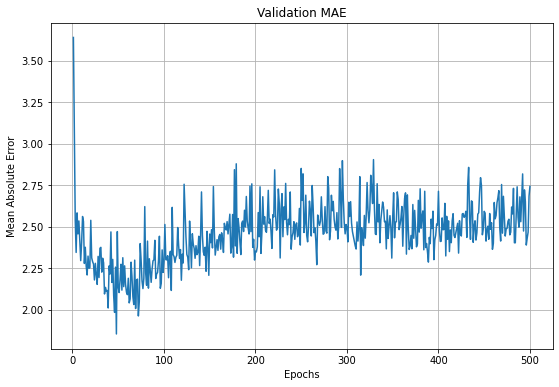

In [15]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_boston.history['val_mae']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_boston.history['val_mae'])
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

* 5번째 이후 MAE 확인

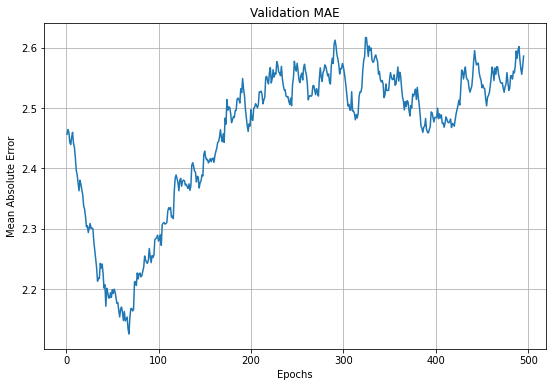

In [16]:
def smooth_curve(points, factor = 0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

mae_history = Hist_boston.history['val_mae']

mae_history = smooth_curve(mae_history[5:])

plt.figure(figsize = (9, 6))
plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

> ## 5) Model Evaluate

In [17]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)

print('MAE is :',test_mae_score)

4/4 [==============================] - 0s 3ms/step - loss: 24.7130 - mae: 2.9674
MAE is : 2.9674153327941895


> ## 6) Keras Session Clear

In [18]:
from tensorflow.keras import backend as K

K.clear_session()

# IV. Early Stopping

> ## 1) Model Define & Compile

In [19]:
from tensorflow.keras import models
from tensorflow.keras import layers

boston = models.Sequential(name = 'EarlyStopping')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

boston.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])

> ## 2) EarlyStopping( )

* monitor : 모니터링 대상 성능
* mode : 모니터링 대상을 최소화(min) 또는 최대화(max)
* patience : 성능이 개선되지 않는 epoch 횟수

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_mae', 
                   mode = 'min', 
                   patience = 50, 
                   verbose = 1)

> ## 3) ModelCheckpoint( )

* 'best_boston.h5' : 최적모델이 저장될 경로
* save_best_only : 최적모델만 저장할지 지정

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_boston.h5', 
                     monitor = 'val_mae', 
                     mode = 'min', 
                     save_best_only = True,
                     verbose = 1)

> ## 4) Model Fit with callbacks

* callbacks : Earlystopping( ) 과 ModelCheckpoint( ) 객체 지정

In [22]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid),
                         callbacks = [es, mc],
                         verbose = 1)

Epoch 1/500
302/323 [===========================>..] - ETA: 0s - loss: 184.1975 - mae: 9.9156 
Epoch 1: val_mae improved from inf to 3.54334, saving model to best_boston.h5
323/323 [==============================] - 1s 2ms/step - loss: 174.9044 - mae: 9.5865 - val_loss: 34.3612 - val_mae: 3.5433
Epoch 2/500
301/323 [==========================>...] - ETA: 0s - loss: 24.0862 - mae: 3.4856
Epoch 2: val_mae improved from 3.54334 to 2.99145, saving model to best_boston.h5
323/323 [==============================] - 1s 2ms/step - loss: 24.1178 - mae: 3.4954 - val_loss: 21.1089 - val_mae: 2.9915
Epoch 3/500
304/323 [===========================>..] - ETA: 0s - loss: 18.4238 - mae: 2.9897
Epoch 3: val_mae improved from 2.99145 to 2.44835, saving model to best_boston.h5
323/323 [==============================] - 1s 2ms/step - loss: 18.4752 - mae: 3.0139 - val_loss: 16.9092 - val_mae: 2.4483
Epoch 4/500
288/323 [=========================>....] - ETA: 0s - loss: 16.9671 - mae: 2.8504
Epoch 4: val_m

> ## 5) Best Model

In [23]:
!ls -l

total 76
-rw-r--r-- 1 root root 71112 Jan 11 03:35 best_boston.h5
drwxr-xr-x 1 root root  4096 Jan  9 14:36 sample_data


> ## 6) Model Evaluate

In [24]:
from tensorflow.keras.models import load_model

best_boston = load_model('best_boston.h5')

In [25]:
test_mse_score, test_mae_score = best_boston.evaluate(X_test, y_test)

print('MAE is :',test_mae_score)

4/4 [==============================] - 0s 3ms/step - loss: 19.4145 - mae: 2.7447
MAE is : 2.744746685028076


# 
# 
# 
# The End
# 
# 
# 